# PW4 - Linear Regression

## Imports

In [6]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [5]:
datafile = "lausanne-appart.csv"

Read the data

In [7]:
dataset = pd.read_csv(datafile)

Display first rows

In [8]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

Text(0.5, 0, 'Dataset distribution of renting price')

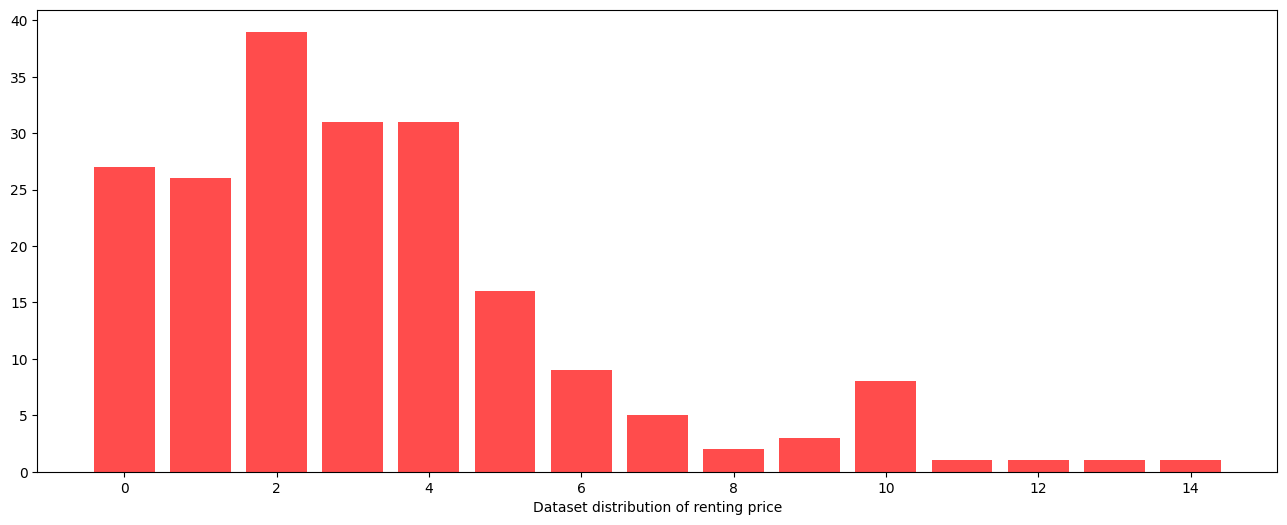

In [10]:
# Your code here

x = dataset[['living_area']]
y = dataset[['rent_price']]

rent_price = np.histogram(y, bins='auto')

plt.figure(figsize=(16,6))
plt.bar(range(len(rent_price[0])), rent_price[0], color="red", alpha=0.7, label="Renting price")
plt.xlabel('Dataset distribution of renting price')

b) Plot a histogram to visualize the distribution of the living area

Text(0.5, 0, 'Dataset distribution of living area')

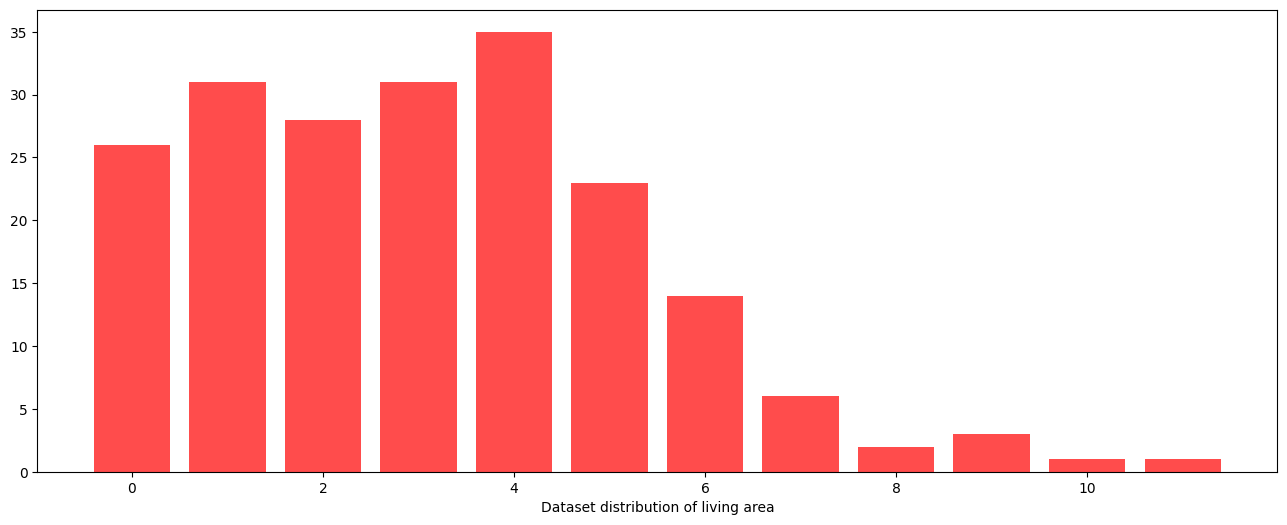

In [11]:
# Your code here
living_area = np.histogram(x, bins='auto')

plt.figure(figsize=(16,6))
plt.bar(range(len(living_area[0])), living_area[0], color="red", alpha=0.7, label="Living area")
plt.xlabel('Dataset distribution of living area')

c) Plot a scatter plot of renting price as a function of living area

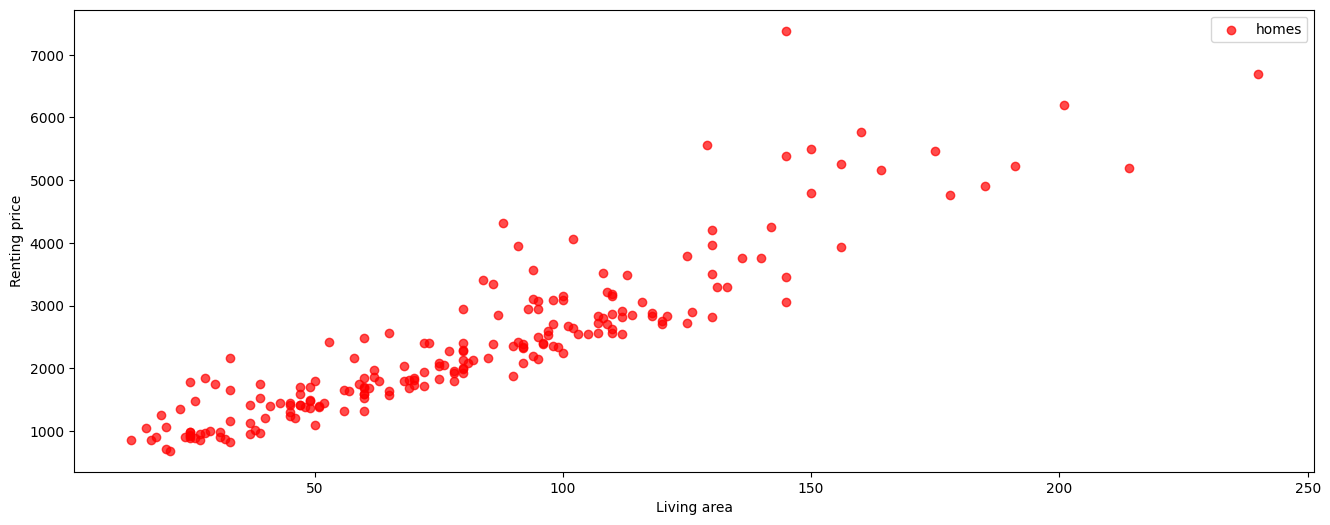

In [12]:
# Your code here
# scatter plot for living area
plt.figure(figsize=(16,6))
plt.scatter(x, y, color="red", alpha=0.7, label="homes")
plt.xlabel('Living area')
plt.ylabel('Renting price')
plt.legend()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

[[240.07710727]
 [ 26.33242457]]


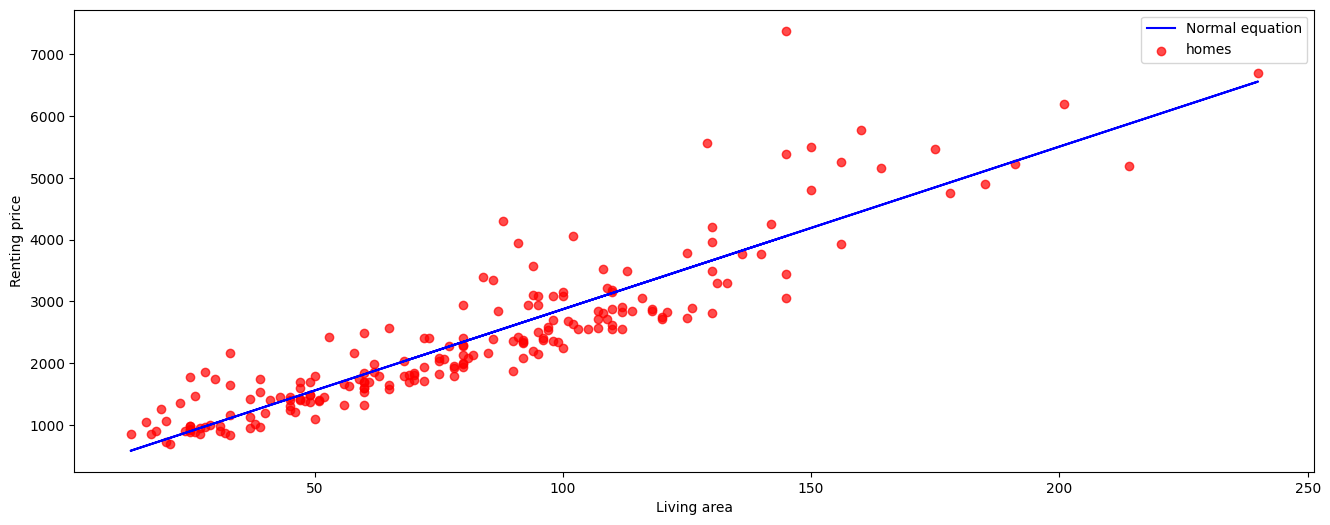

In [15]:
# Your code here

def get_best_param(x, y):
    x_transpose = np.transpose(x)
    # on inverse la matrice X, on multiplie par la transposée de X et on multiplie par Y
    return np.linalg.inv(x_transpose.dot(x)).dot(x_transpose).dot(y)

vector_x = np.c_[np.ones(x.shape[0]), x] # on construit le vecteur X
theta = get_best_param(vector_x, y) # on calcule les paramètres theta de la droite
print(theta)
prediction = vector_x.dot(theta) # on trouve les points de la droite pour chaque valeur de X

plt.figure(figsize=(16,6))
plt.scatter(dataset[['living_area']], dataset[['rent_price']], color="red", alpha=0.7, label="homes")
plt.plot(dataset[['living_area']], prediction, color="blue", label="Normal equation")
plt.xlabel('Living area')
plt.ylabel('Renting price')
plt.legend()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [16]:
# Your code here
J_theta = (1 / (2 * len(x))) * np.sum(np.square(prediction - y))
print("overall cost: " +str(J_theta[0]))

overall cost: 138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [111]:
# Your code here
def gradient_descent(x, y, theta, alpha, iterations, epsilon):
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        prediction = x.dot(theta)
        #theta = theta - alpha * (1 / len(x)) * (np.transpose(x).dot(prediction - y))
        theta = theta - alpha * (1 / len(x)) * np.sum(np.transpose(x).dot(prediction - y))

        J_history[i] = (1 / (2 * len(x))) * np.sum(np.square(prediction - y))        
        if i > 0 and (J_history[i-1] - J_history[i]) / J_history[i] < epsilon:
            break
    return theta, J_history

theta0 = np.random.rand(2,1) # tester avec d'autres valeurs de theta
theta, J_history = gradient_descent(vector_x, y, theta0, 0.000001, 500, 0.000001)

print(theta)

[[27.99504264]
 [28.007748  ]]


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

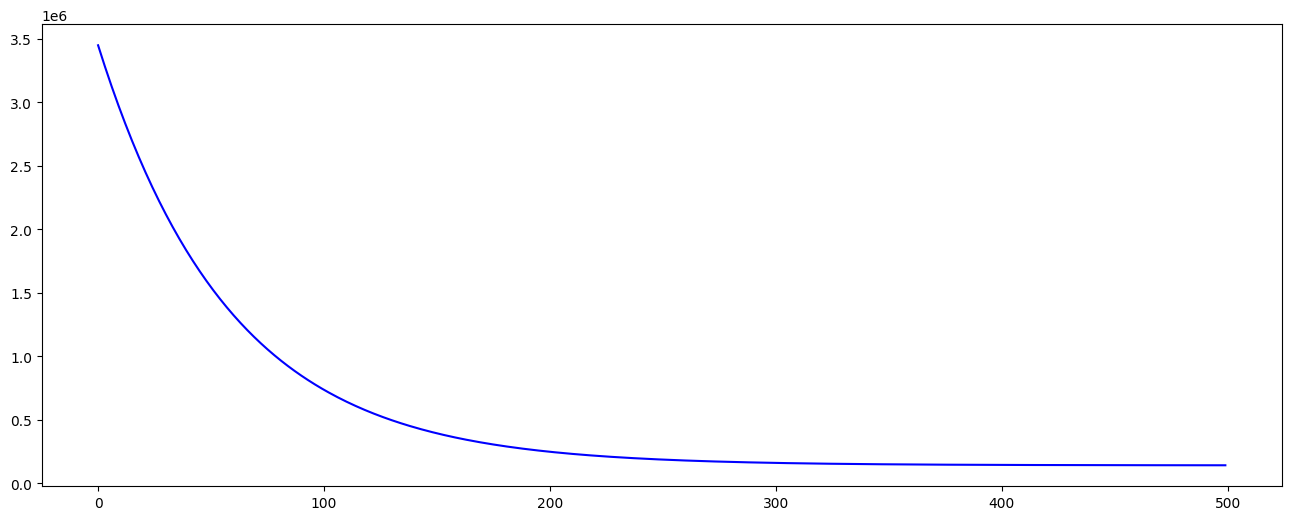

In [112]:
# Your code here
plt.figure(figsize=(16,6))
plt.plot(J_history, color="blue", label="Normal equation")

_Your answer here_ : 
CA CONVERGE A 500 ITERATIONS.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

_Your answer here_ : 
QUAND L'ECART ENTRE LE THETA PRECEDENT ET LE NOUVEAU EST TRES FAIBLE (ON DETERMINE UN SEUIL DE DIFFERENCE MINIMAL).

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

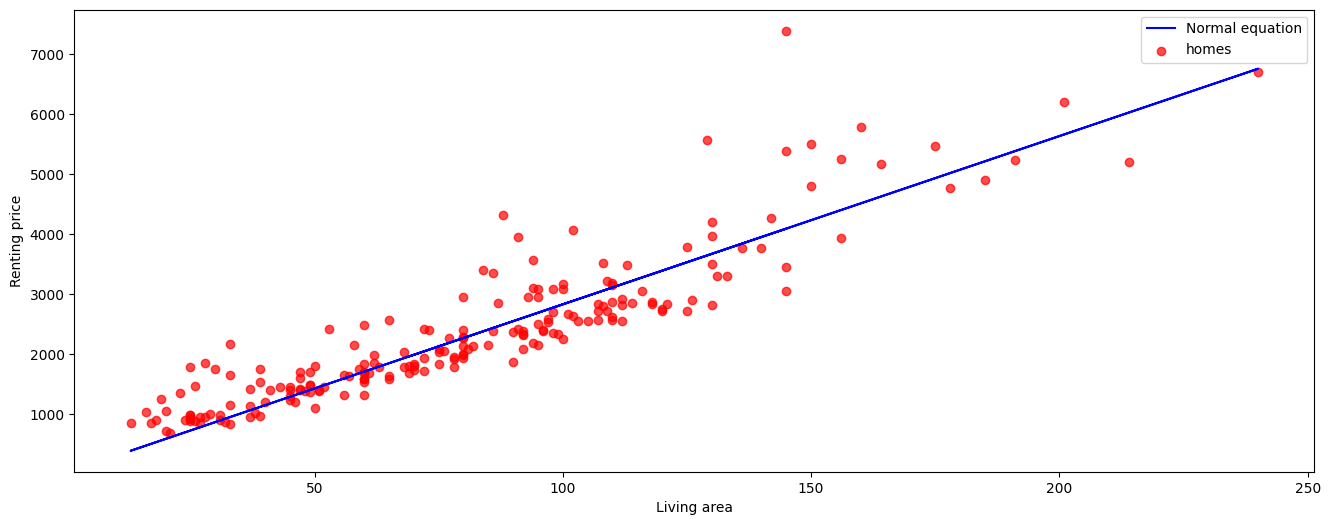

In [113]:
# Your code here
prediction = vector_x.dot(theta)

plt.figure(figsize=(16,6))
plt.scatter(dataset[['living_area']], dataset[['rent_price']], color="red", alpha=0.7, label="homes")
plt.plot(dataset[['living_area']], prediction, color="blue", label="Normal equation")
plt.xlabel('Living area')
plt.ylabel('Renting price')
plt.legend()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [116]:
# Your code here
J_theta = (1 / (2 * len(x))) * np.sum(np.square(prediction - y))
print("overall cost: " + str(J_theta[0]))

overall cost: 143432.18963458232


_Your answer here_ : ON EST PAS PLUS PRECIS, ON DEPEND BEAUCOUP DE LA GENERATION DU PREMIER THETA ET DE ALPHA ENFAITE.


## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [443]:
# Your code here
def stochastic_gradient_descent(x, y, theta, alpha, iterations, delta):
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
    ########
        index = random.randint(0, len(x) - 1)
        #prediction = x.dot(theta)
        prediction = x.dot(theta)[index]
        print(prediction)
        theta = theta - alpha * (np.transpose(x).dot(prediction - y))
        #theta = theta - alpha * (prediction - y.values[index]) * x[index]
    ########
        J_history[i] = (1 / (2 * len(x))) * np.sum(np.square(prediction - y))
        if i > 0 and (J_history[i-1] - J_history[i]) / J_history[i] < delta:
            print("sample to converge: " + str(i))
            break
    return theta    
theta0 = np.random.rand(2,1)
theta = stochastic_gradient_descent(vector_x, y, theta0, 0.000001, 100000, 0.1)
print(theta)

sample to converge: 8
[[ 0.49480009]
 [29.56700929]]


a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

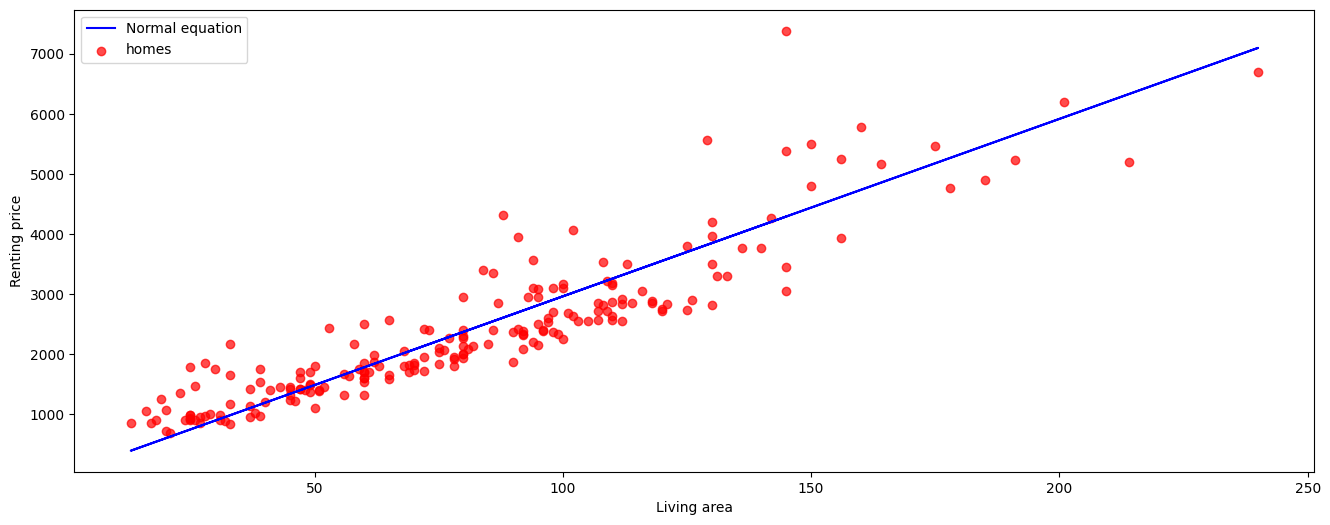

In [444]:
# Your code here
prediction = vector_x.dot(theta)

plt.figure(figsize=(16,6))
plt.scatter(dataset[['living_area']], dataset[['rent_price']], color="red", alpha=0.7, label="homes")
plt.plot(dataset[['living_area']], prediction, color="blue", label="Normal equation")
plt.xlabel('Living area')
plt.ylabel('Renting price')
plt.legend()

b) How many samples do you need to visit for reaching the convergence?

_Your answer here_

c) What kind of stopping criterion could we use here?

_Your answer here_

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [445]:
# Your code here
J_theta = (1 / (2 * len(x))) * np.sum(np.square(prediction - y))
print("overall cost: " +str(J_theta[0]))

overall cost: 147641.0879456247


_Your answer here_

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

_Your answer here_

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

_Your answer here_

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

_Your answer here_

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

_Your answer here_

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_